In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from vaccination import vaccination_dashboard, vaccination_changes
import requests

In [4]:
release=None

In [6]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-02-04,2021-02-03,United Kingdom,K02000001,3094,NaN,219.0,801949.0
1,2021-02-04,2021-02-02,United Kingdom,K02000001,16159,NaN,544.0,606382.0
2,2021-02-04,2021-02-01,United Kingdom,K02000001,21012,NaN,721.0,643204.0
3,2021-02-04,2021-01-31,United Kingdom,K02000001,15288,2375.0,713.0,574012.0
4,2021-02-04,2021-01-30,United Kingdom,K02000001,16602,2441.0,770.0,439006.0
...,...,...,...,...,...,...,...,...
366,2021-02-04,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
367,2021-02-04,2020-02-02,United Kingdom,K02000001,0,NaN,NaN,NaN
368,2021-02-04,2020-02-01,United Kingdom,K02000001,1,NaN,NaN,NaN
369,2021-02-04,2020-01-31,United Kingdom,K02000001,2,NaN,NaN,NaN


In [7]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-02-04.csv')

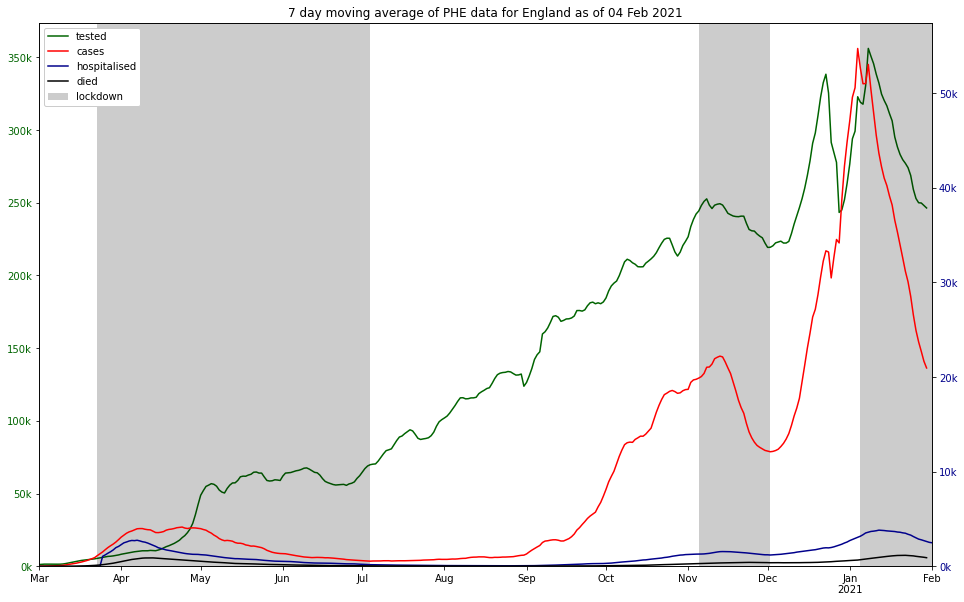

In [8]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [9]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-02-04.csv')

In [10]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-02-04.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,466171.0,9041835.0,8575664.0,56286961,0.828204,15.235614,83.936182
1,Northern Ireland,N92000002,25539.0,263735.0,238196.0,1893667,1.348653,12.578558,86.072789
2,Scotland,S92000003,9159.0,694347.0,685188.0,5463300,0.167646,12.541651,87.290703
3,Wales,W92000004,1216.0,490570.0,489354.0,3152879,0.038568,15.520862,84.440570


'partial: 10,490,487'

'full: 502,085'

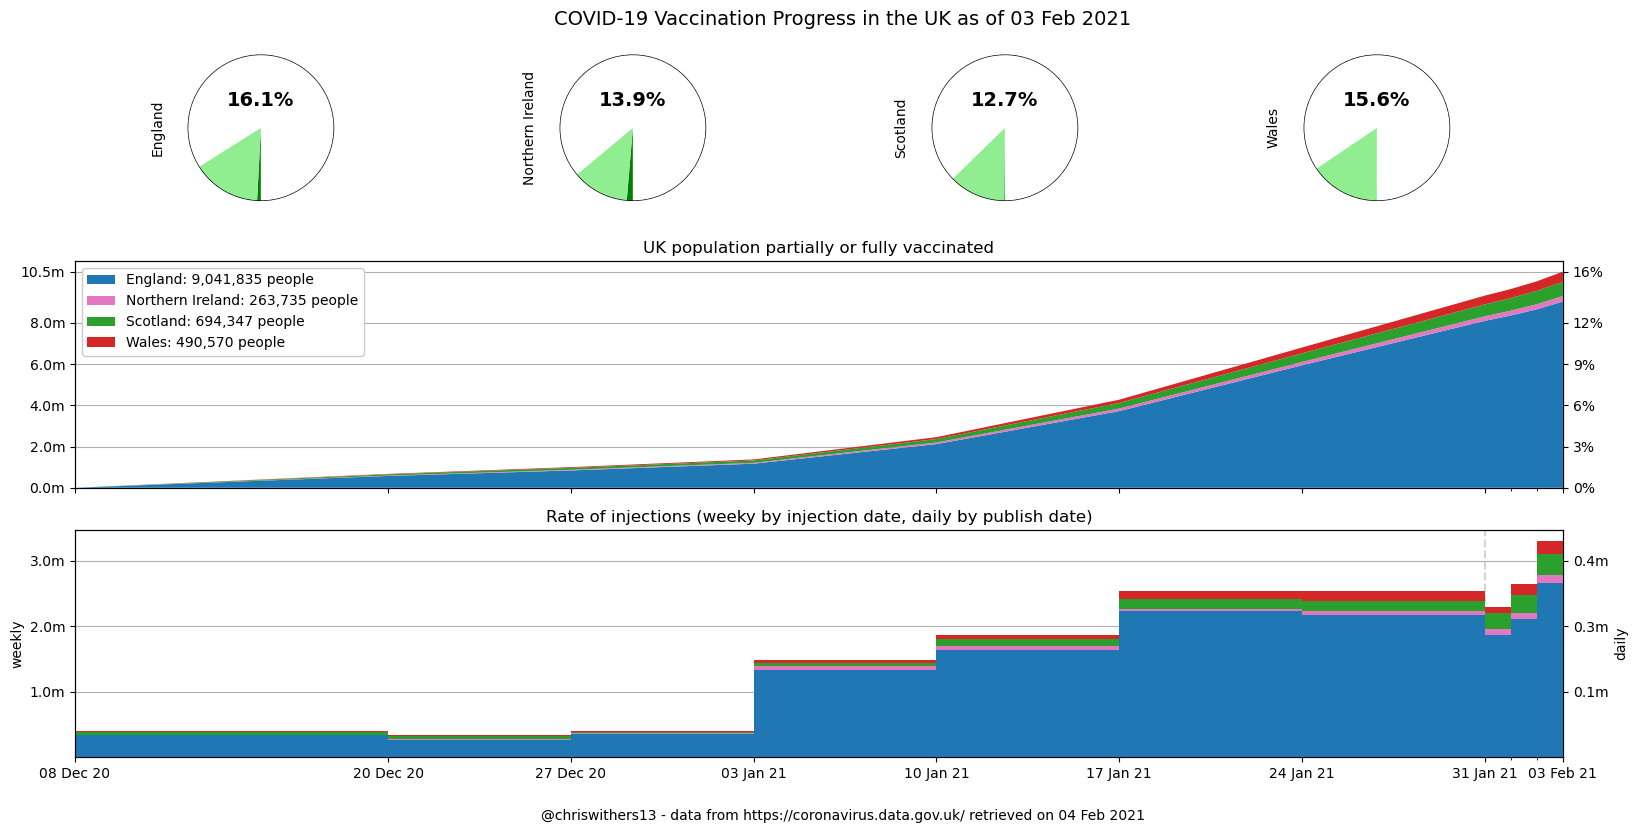

In [11]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [12]:
vaccination_changes()

In [13]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-02-04.csv')

In [14]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-02-04.csv')

In [15]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-02-04.csv')